In [1]:
import numpy
import cmath
import math
import matplotlib.pyplot as plt


In [2]:
# Функция F(p)
def F(p):
    return (p ** (1/2) - p ** (1/3)) / (p + 5)

In [3]:
# Функция fi(p)
def fi(p):
    return p * F(p)

In [4]:
# Функция G(z, t) (t > 0)
def G(z, t):
    return F((1 - z)/ t) / t


In [5]:
# Функция e_m(x)
def e_m(m, x):
    return cmath.exp(2 * cmath.pi * x * 1j / m)

In [6]:
# Вычисление r от параметра n
def comp_r(n):
    max = 100
    a = 0.0
    b = 1.0
    for i in range(100):
        c = (a + b) / 2
        if (c + 0.001) ** n - (c + 0.001) ** (n + 1) > (c - 0.001) ** n - (c - 0.001) ** (n + 1):
            a = c
        else:
            b = c
    return c

In [7]:
# Вычисление m от второго слагаемого
def comp_m(n, e):
    r = comp_r(n)
    M = 1
    m = 1
    while M * r ** m / (1 - r ** m) > e / ((1 - r) * r ** n):
        m += 1
    return m

In [8]:
# Функция W_n_m(f, t)
def W_n_m(m, n, r, t):
    sum = 0
    for j in range(1, m):
        sum += (r * e_m(m, j)) ** (-n) * fi(n * (1 - r * e_m(m, j)) / t) / (1 - r * e_m(m, j))
    return sum / m

In [9]:
# Вычисление в точках (Метод Виддера W_n_m(f, t))
def solut_1(n, e, t):
    r = comp_r(n)
    m = comp_m(n, e)
    return W_n_m(m, n, r, t)

In [10]:
# Вычисление всех d_j
def comp_d_j(k):
    d_j = [2 * j for j in range(1, k + 1)]
    return d_j

In [11]:
# Вычисление всех c_k_j
def comp_c_k_j(n, k):
    d_j = comp_d_j(k)
    c_k_j = []
    for j in range(1, k + 1):
        ans = 1
        for i in range(1, n + 1):
            if i != j:
                ans *= d_j[j - 1] / (d_j[j - 1] - d_j[i - 1])
        c_k_j.append(ans)
    return c_k_j

In [12]:
# Вычисление в точках (ускоренный Виддер W_n(k, f, t))
def solut_2(n, k, e, t):
    d_j = comp_d_j(k)
    c_k_j = comp_c_k_j(n, k)
    ans = 0
    for j in range(1, k + 1):
        r = comp_r(n * d_j[j - 1])
        m = comp_m(n * d_j[j - 1], e)
        ans += c_k_j[j - 1] * W_n_m(m, n * d_j[j - 1], r, t)
    return ans

In [13]:
# Разложение F(p) в ряд (n - количество элементов в ряде)
def row_F(n, t):
    ans = 0
    for i in range(n):
        ans += 5 ** i * t ** (i - 0.5) / math.gamma(i - 0.5)
    for i in range(n):
        ans -= 5 ** i * t ** (i - 2 / 3) / math.gamma(i - 2 / 3)
    return ans

In [14]:
print('F(p) = (p^(1/2) - p^(1/3)) / (p + 5)')
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey']
    

F(p) = (p^(1/2) - p^(1/3)) / (p + 5)


C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Ad

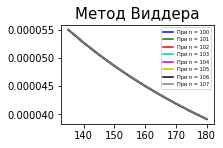

In [18]:
    # Метод Виддера
    n1 = 100
    e = 1e-12
    for i in range(8):
        X = []
        Y = []
        for j in range(10):
            X.append(j * 5 + 135)
            Y.append(solut_1(i + n1, e, j * 5 + 135).real)
        plt.subplot(2, 2, 1)
        plt.title('Метод Виддера', fontsize = 15)
        plt.plot(X, Y, color = color[i], marker = '', linestyle = '-', markerfacecolor = color[i], label = 'При n = ' + str(i + n1))
    plt.legend(loc = 'best', prop={"size":5})


C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Ad

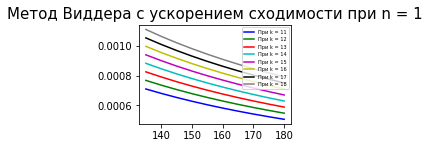

In [21]:
    # Метод Виддера с ускоренеим сходимости
    k = 11
    n2 = 1
    for i in range(8):
        X = []
        Y = []
        for j in range(10):
            X.append(j * 5 + 135)
            Y.append(solut_2(n2, i + k, e, j * 5 + 135).real)
        plt.subplot(2, 2, 2)
        plt.title('Метод Виддера с ускорением сходимости при n = ' + str(n2), fontsize = 15)
        plt.plot(X, Y, color = color[i], marker = '', linestyle = '-', markerfacecolor = color[i], label = 'При k = ' + str(i + k))
    plt.legend(loc = 'best', prop={"size":5})

C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oleg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Ad

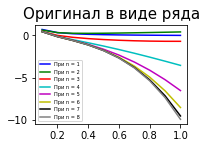

In [22]:
    # Оригинал в виде ряда
    # n - количество элементов в ряде
    n3 = 1
    for i in range(8):
        X = []
        Y = []
        for j in range(10):
            X.append((j + 1) / 10)
            Y.append(row_F(i + n3,  (j + 1) / 25))
        plt.subplot(2, 2, 3)
        plt.title('Оригинал в виде ряда', fontsize = 15)
        plt.plot(X, Y, color = color[i], marker = '', linestyle = '-', markerfacecolor = color[i], label = 'При n = ' + str(i + n3))
        # plt.ylim(-1, 1)
    plt.legend(loc = 'best', prop={"size":5})

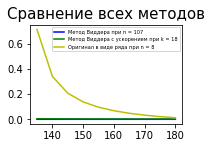

In [26]:
    X = []
    Y1, Y2, Y3 = [], [], []
    for j in range(10):
        X.append(j * 5 + 135)
        Y1.append(solut_1(7 + n1, e, j * 5 + 40).real)
        Y2.append(solut_2(n2, 7 + k, e, j * 5 + 40).real)
        Y3.append(row_F(n3, (j + 1) / 25))
    plt.subplot(2, 2, 4)
    plt.title('Сравнение всех методов', fontsize = 15)
    plt.plot(X, Y1, color = color[0], marker = '', linestyle = '-', markerfacecolor = color[0], 
             label = 'Метод Виддера при n = ' + str(7 + n1))
    plt.plot(X, Y2, color = color[1], marker = '', linestyle = '-', markerfacecolor = color[1], 
             label = 'Метод Виддера с ускорением при k = ' + str(7 + k))
    plt.plot(X, Y3, color = color[5], marker = '', linestyle = '-', markerfacecolor = color[5], 
             label = 'Оригинал в виде ряда при n = ' + str(7 + n3))
    plt.legend(loc = 'best', prop={"size":5})
    # plt.ylim(-1, 1)

Метод с ускоренной сходимостью стремится быстрее, чем обычный метод Виддера